In [33]:

import os
from postprocessing.util import *
import pandas as pd
import scipy
from scipy.stats import gaussian_kde
from scipy.signal import argrelextrema
import seaborn as sns
import matplotlib as mpl
import matplotlib.animation as mpl_animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

MAX_HEADMARKER_DIST = 25
SEGMENT_BINSIZE     = 0.25
DEBUG               = False

# Change working directory
os.chdir('Z:/people/Abel/perching-analysis/data/')

%matplotlib inline

In [2]:
file = '2016-11-14 14-09-32_Cortex.msgpack'

In [3]:
countRecords(file)

Determining number of records
Total number of records: 4448565


4448565

In [52]:
pairwiseDsts = []
frameids = []
for frame in readYFrames(file, nearbyVertexRange=MAX_HEADMARKER_DIST):
    if (frame.frame%100000)==0:
        print(frame.frame)
    frameids.append(frame.frame)
    # Is this frame in a perching range?
    for c in frame.nearbyVertices:
        # Compute all pairwise distances
        for i1 in range(len(frame.nearbyVertices)):
            for i2 in range(len(frame.nearbyVertices)):
                if i1 > i2:
                    pairwiseDsts.append( np.linalg.norm(frame.nearbyVertices[i1] - frame.nearbyVertices[i2]) )
    if (frame.frame>1000000): 
        break


100000
300000
400000
500000
600000
700000
800000
900000
1000000


In [61]:
pw = np.array([x for x in pairwiseDsts if x < 10])
len(pairwiseDsts), len(pw)

(3721570, 2731160)

In [86]:
hist = np.histogram(pw, bins=int(max(pw)/SEGMENT_BINSIZE))

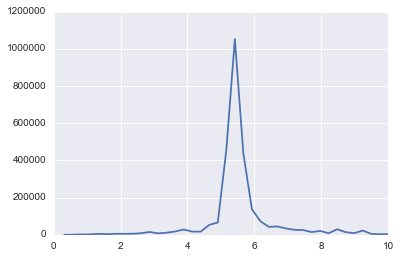

In [87]:
plt.plot(hist[1][1:], hist[0])

In [82]:
numframes = len(set(frameids))
numframes

884919

In [97]:
lm = [0.5*(hist[1][i]+hist[1][i+2]) for i in argrelextrema(hist[0], np.greater)[0] if hist[0][i]>numframes]
lm

[5.414187074809945]

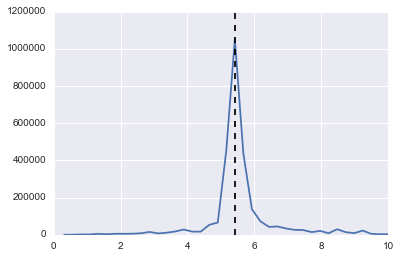

In [98]:
plt.plot(hist[1][1:], hist[0])
for l in lm:
    plt.axvline(x=l, color='k', linestyle='--')